# *Model:* ARMA
# *Stock Data:* NSEI
# *Name: *Abbas Amjherawala**

In [16]:
#install yfinance library that helps in stock data retrieval 
!pip install yfinance

#import necessary libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import warnings

#ignore any future warnings
warnings.filterwarnings('ignore')

In [17]:
#to import NSEI stock data, set ticker symbol to ^NSEI
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)
data

yfinance.Ticker object <^NSEI>

In [18]:
#retrieve data from this day one year before to today
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)
tomorrow = end_date + datetime.timedelta(days=1)
prices = data.history(start=start_date, end=end_date).Close
prices

Date
2022-03-14 00:00:00+05:30    16871.300781
2022-03-15 00:00:00+05:30    16663.000000
2022-03-16 00:00:00+05:30    16975.349609
2022-03-17 00:00:00+05:30    17287.050781
2022-03-21 00:00:00+05:30    17117.599609
                                 ...     
2023-03-03 00:00:00+05:30    17594.349609
2023-03-06 00:00:00+05:30    17711.449219
2023-03-08 00:00:00+05:30    17754.400391
2023-03-09 00:00:00+05:30    17589.599609
2023-03-10 00:00:00+05:30    17412.900391
Name: Close, Length: 248, dtype: float64

In [19]:
#calculate returns
returns = prices.pct_change().dropna()
returns

Date
2022-03-15 00:00:00+05:30   -0.012346
2022-03-16 00:00:00+05:30    0.018745
2022-03-17 00:00:00+05:30    0.018362
2022-03-21 00:00:00+05:30   -0.009802
2022-03-22 00:00:00+05:30    0.011561
                               ...   
2023-03-03 00:00:00+05:30    0.015729
2023-03-06 00:00:00+05:30    0.006656
2023-03-08 00:00:00+05:30    0.002425
2023-03-09 00:00:00+05:30   -0.009282
2023-03-10 00:00:00+05:30   -0.010046
Name: Close, Length: 247, dtype: float64

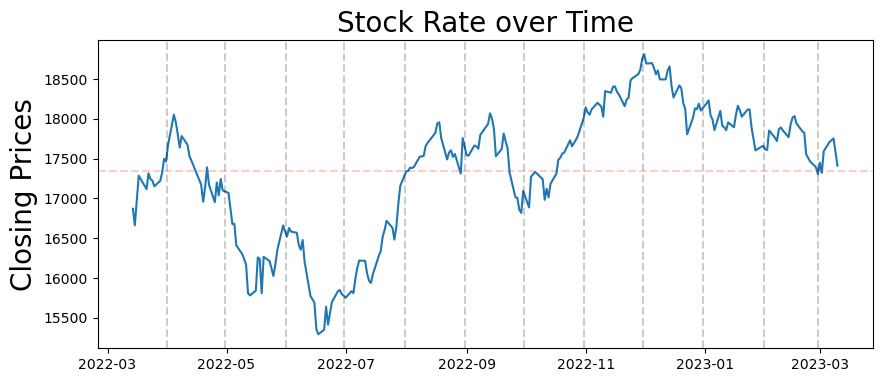

In [20]:
#plot the stock close price against time
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices', fontsize=20)
plt.title('Stock Rate over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(prices.mean(), color='r', alpha=0.2, linestyle='--')

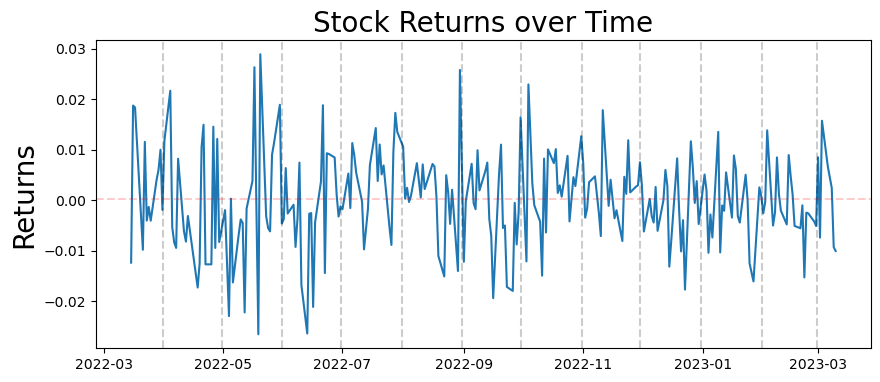

In [21]:
#plot the stock returns against time
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)
plt.title('Stock Returns over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(returns.mean(), color='r', alpha=0.2, linestyle='--')

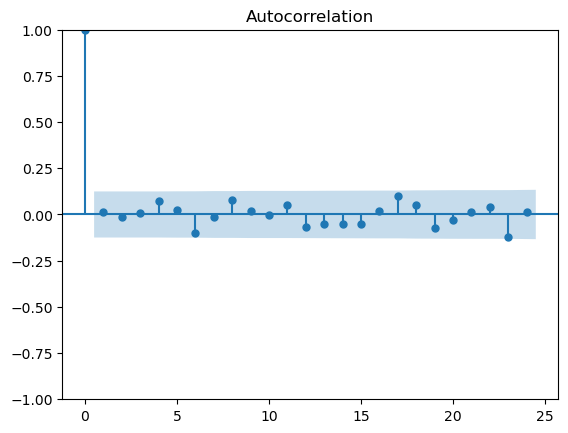

In [22]:
#plot acf to check MA order, here we can't see any informative lag
plot_acf(returns)
plt.show()

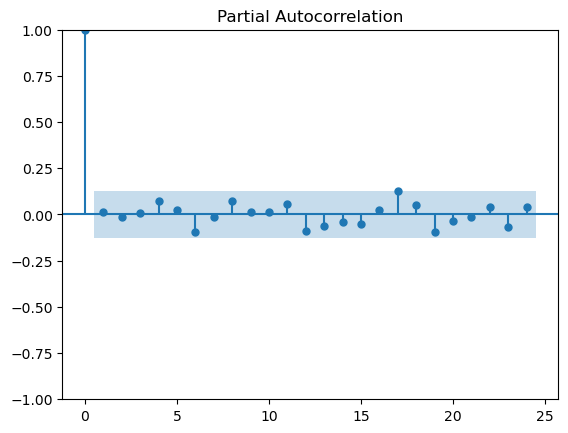

In [23]:
#plot pacf to check AR order, here we can't see any informative lag
plot_pacf(returns, method='ywm')
plt.show()

In [24]:
#give ARIMA model a manual random order and fit it
model = ARIMA(prices, order=(7, 0, 6))
fitted = model.fit()

In [25]:
#predict the next day close price
next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print(f"Predicted price for the {tomorrow}, i.e. tomorrow:", predicted_price)

Predicted price for the 2023-03-14, i.e. tomorrow: 17461.563590533562
